# Метод наименьших квадратов. Обработка экспериментальных данных

Настоящая программа реализует приближение зависимости измеряемых значений при наличии серии экспериментально определенных значений в конечном числе точек. Зависимость приближается многочленом 3-й степени. В основе программы лежит метод наименьших квадратов. Экспериментальные данные загружаются в Excel-таблицу. Алгоритм использует библиотеки pandas, numpy и matplotlib.

Идея метода наименьших квадратов при приближении зависимости многочленом ax^3 + bx^2 + cx + d заключается в подборе таких коэффициентов a, b, c, d, при которых сумма квадратов отклонений значений функции в измеренных точках от экспериментальных данных была бы минимальной.
В таком случае мы получаем функцию, зависящую от 4-х переменных a, b, c, d. Минимум достигается в случае, когда частные производные по всем аргументам равны нулю.
Получаем СЛАУ относительно a, b, c, d.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_excel(r'C:\Users\1\Desktop\data.xls')
df = pd.DataFrame(data)
x = [0] * df.shape[0]
y = [0] * df.shape[0]
for i in range (0, df.shape[0]):
    x[i] = df['x'].iloc[i]
    y[i] = df['y'].iloc[i]

In [3]:
xmin = min(x) - 1 #левый конец графика
xmax = max(x) + 1 #правый конец графика
sum6 = 0 #сумма 6-х степеней x_i
sum5 = 0 #сумма 5-х степеней x_i
sum4 = 0 #сумма 4-х степеней x_i
sum3 = 0 #сумма 3-х степеней x_i
sum2 = 0 #сумма 2-х степеней x_i
sum1 = 0 #сумма x_i
sum0 = 0 #число измеренных значений
suma = 0 #сумма в правой части 1-го уравнения
sumb = 0 #сумма в правой части 2-го уравнения
sumc = 0 #сумма в правой части 3-го уравнения
sumd = 0 #сумма в правой части 4-го уравнения

In [4]:
for number in x:
    sum6 += number**6
for number in x:
    sum5 += number**5
    sum4 += number**4
    sum3 += number**3
    sum2 += number**2
    sum1 += number
    sum0 += 1
for i in range (0, len(x)):
    suma += y[i]*(x[i])**3
    sumb += y[i]*(x[i])**2
    sumc += y[i]*x[i]
    sumd += y[i]

In [5]:
a = np.array([[sum6, sum5, sum4, sum3],
              [sum5, sum4, sum3, sum2],
              [sum4, sum3, sum2, sum1],
              [sum3, sum2, sum1, sum0]])
b = np.array([suma,
              sumb,
              sumc,
              sumd])
c = np.linalg.solve(a, b)

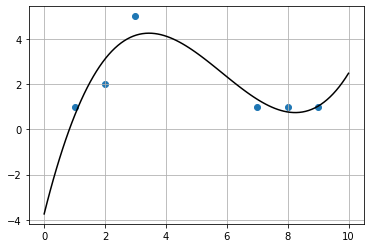

In [8]:
t = np.linspace(xmin, xmax, 100)
z = c[0]*(t**3) + c[1]*(t**2) + c[2]*t + c[3]
plt.plot(t, z, 'k')
plt.grid(True)
plt.scatter (x, y)
plt.show()

Вывод: была написана программа, которая обрабатывает экспериментальные данные и приближает зависимость многочленом 3-й степени с помощью метода наименьших квадратов. Алгоритм использует ресурсы библиотек pandas, numpy и matplotlib.